In [1]:
from math import cos, sin, pi

import numpy as np
from numpy import inf
import matplotlib.pyplot as plt

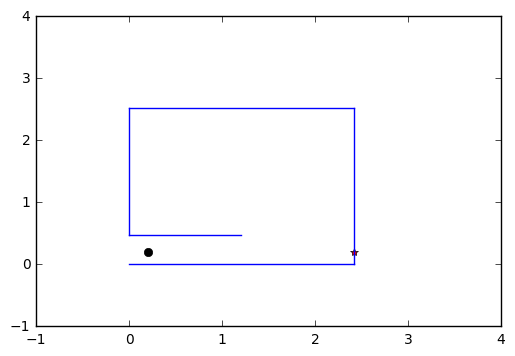

In [56]:
class Map:
    
    def __init__(self, map_path=None):
        self.edges = []

        # Read map from text file
        if map_path:
            with open(map_path) as f:
                for line in f:
                    if line[0] == '#':
                        continue
                    self.add_edge(*[float(c) for c in line.split()])
                    
    def add_obstacle(self, obstacle):
        pass
    
    def plot(self):
        for x1, y1, x2, y2 in self.edges:
            plt.plot([x1, x2], [y1, y2], 'b')
    
    def add_edge(self, x1, y1, x2, y2):
        self.edges.append((x1, y1, x2, y2))
        
    def scan_one(self, x, y, theta, alpha):
        """returns distances for one angle
        x, y: float
             position in meters
        theta: float
            robot rotation in radians
        alpha: float
            in what direction, relative to robot, to scan
        """
        n = len(self.edges)
        distances = np.zeros(n)
        for i, edge in enumerate(self.edges):
            dist = self._distance(x, y, theta, alpha, *edge)
            distances[i] = dist
        
        return np.min(distances)
    
    def _distance(self, x1, x2, theta, alpha, a1, a2, b1, b2):
        """
        Returns distance given one position, one edge, and an angle alpha
        """
        a = np.array([[a1, a2]]).T
        b = np.array([[b1, b2]]).T
        x = np.array([[x1, x2]]).T
        try:
            k = 1.0 / ((a2 - b2) * cos(theta + alpha) + sin(theta + alpha) * (b1 - a1))
            A = np.array([
                [ a2 - b2   , b1 - a1   ],
                [-sin(theta + alpha), cos(theta + alpha)]
            ])
            s, t = (k * np.dot(A, (a - x))).flatten()
            if 0 <= t <= 1 and 0 < s:
                return s
        except ZeroDivisionError:
            pass
        return np.inf
        
m = Map(map_path='map.txt')

def angle_to_rad(angle):
    return np.pi * angle / 180.0

x, y = 0.2, 0.2
alpha, theta = angle_to_rad(-45), angle_to_rad(45)
distance = m.scan_one(x, y, theta, alpha)
plt.plot(x + distance * cos(alpha + theta), y + distance * sin(alpha + theta), 'r*')
m.plot()
plt.plot(x, y, 'ko')
plt.xlim((-1, 4))
plt.ylim((-1, 4))
plt.show()

In [105]:
class Particle:
    
    def __init__(self, x, y, theta):
        self.x = x
        self.y = y
        self.theta = theta
        
    def update(self, delta_forward, delta_theta):
        self.theta += delta_theta + np.random.normal(0, 0.08)
        forward_noise = np.random.normal(0, 0.03)
        self.x += np.cos(self.theta) * delta_forward + forward_noise
        self.y += np.sin(self.theta) * delta_forward + forward_noise
        
    def plot(self):
        plt.plot(self.x, self.y, 'k.')
    
    def __repr__(self):
        return 'Particle at: {} {} {}'.format(self.x, self.y, self.theta)

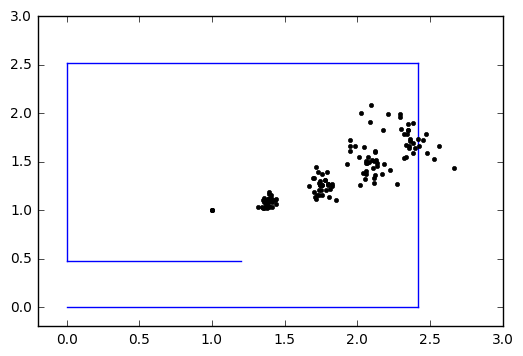

In [112]:
ps = [Particle(1, 1, 0) for _ in range(32)]
plt.xlim((-0.2, 3))
plt.ylim((-0.2, 3))
m.plot()
p.plot()
for i in range(4):
    map(lambda p: p.update(0.4, 0.2), ps)
    map(lambda p: p.plot(), ps)
    p.plot()
plt.show()